In [225]:
import pandas as pd 
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py
from datetime import datetime
from datetime import timedelta

In [226]:

# Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
cufflinks.go_offline()

# Set global theme
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.figure_factory as ff

# Data Preparation

In [227]:
df=pd.read_csv("creditcard.csv")

In [228]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [229]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no nulls

In [230]:
pd.value_counts(df['Class'], sort = True)

0    284315
1       492
Name: Class, dtype: int64

In [231]:
df[df.Class==1].shape[0]/df.shape[0]

0.001727485630620034

The dataset is highly skewed with only 0,17% of all transactions being Frauds

In [232]:
df_fraud=df[df.Class==1]
df_normal=df[df.Class==0]

In [233]:
df_fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [234]:
df_normal.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Frauds tend to have higher mean ammounts with a lower maximum value

# Feature correlation

In [235]:
import plotly.graph_objects as go

corr_matrix = df.corr()

fig = go.Figure(data=go.Heatmap(
                   z=np.where(corr_matrix.values==1,0,corr_matrix.values),
                   x=list(df.columns),
                   y=list(df.columns)))
fig.show()

Class seems to have medium correlation with some of the features, V17 beeing the strongest

In [236]:
features=df.columns[:-1]
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [237]:
labels=df.columns[-1]
labels

'Class'

In [238]:
X=df[features].values
y=df[labels]

In [239]:
X.shape

(284807, 30)

In [240]:
y.shape

(284807,)

### Splitting data for training and testing

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [242]:
y_train.sum()/len(y_train)

0.001729245759178389

In [243]:
y_test.sum()/len(y_test)

0.0017204452090867595

In [244]:
outlier_share=y_train.sum()/len(y_train)

In [245]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# ML models comparison

## Isolation Forest

In [310]:
model_IF=IsolationForest(n_estimators=100,
                         contamination=outlier_share*5)



In [311]:
model_IF.fit(X_train)


IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.008646228795891945, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

In [312]:
y_pred_IF=model_IF.predict(X_test)

In [313]:
y_pred_IF=np.where(y_pred_IF==-1,1,0)

In [314]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [315]:
IF_precision=precision_score(y_test,y_pred_IF)
IF_recall=recall_score(y_test,y_pred_IF)

In [316]:
IF_recall

0.5612244897959183

In [317]:
IF_precision

0.10617760617760617

In [355]:
IF_prec=[]
IF_rec=[]
for i in range(1,16):

    model=IsolationForest(n_estimators=100,contamination=(outlier_share*i/3))
    model.fit(X_train);
    y_pred_IF=model.predict(X_test)
    y_pred_IF=np.where(y_pred_IF==-1,1,0)
    IF_prec.append(precision_score(y_test,y_pred_IF))
    IF_rec.append(recall_score(y_test,y_pred_IF))

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.000576415253059463, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.001152830506118926, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.0017292457591783887, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.002305661012237852, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.002882076265297315, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.0034584915183567774, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.00403490677141624, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.004611322024475704, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.005187737277535167, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.00576415253059463, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.006340567783654092, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.006916983036713555, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.007493398289773019, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.00806981354283248, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

IsolationForest(behaviour='deprecated', bootstrap=False,
                contamination=0.008646228795891945, max_features=1.0,
                max_samples='auto', n_estimators=100, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

## LOF Classifier

In [319]:
model_LOF=LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                        leaf_size=30,contamination=outlier_share*5, novelty=True)


model_LOF.fit(X_train)

LocalOutlierFactor(algorithm='auto', contamination=0.008646228795891945,
                   leaf_size=30, metric='minkowski', metric_params=None,
                   n_jobs=None, n_neighbors=20, novelty=True, p=2)

In [320]:
y_pred_LOF=model_LOF.predict(X_test)
y_pred_LOF=np.where(y_pred_LOF==-1,1,0)

In [321]:
precision_score(y_test,y_pred_LOF)


0.017094017094017096

In [322]:
recall_score(y_test,y_pred_LOF)

0.08163265306122448

### Isolation Forest seems to be dooing a better job in regards to both recall and precision. Will DNN be even better?

# Autocoder with DNN

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

In [323]:
X.shape

(284807, 30)

In [324]:
input_dim=int(X.shape[1])
encoding_dim=int(input_dim/2)
hidden_dim=int(encoding_dim/2)
n_epochs=100
batch_size = 128

In [325]:
X.shape

(284807, 30)

In [326]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [327]:


model=keras.models.Sequential([

    keras.layers.Dense(input_shape=[input_dim ],units=encoding_dim, activation='tanh'),
    keras.layers.Dense(units=hidden_dim, activation='relu'),
    keras.layers.Dense(units=encoding_dim, activation='relu'),
    keras.layers.Dense(units=input_dim, activation='tanh'),



])

In [328]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_96 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_97 (Dense)             (None, 15)                120       
_________________________________________________________________
dense_98 (Dense)             (None, 30)                480       
Total params: 1,177
Trainable params: 1,177
Non-trainable params: 0
_________________________________________________________________


In [329]:
optimizer = keras.optimizers.Adam(lr=0.006)
model.compile(optimizer=optimizer, 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

In [330]:
history = model.fit(X_train_scaled, X_train_scaled,
                    epochs=n_epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test_scaled, X_test_scaled),
                    verbose=1)

Train on 227845 samples, validate on 56962 samples
Epoch 1/100
227845/227845 [==============================] - 7s 29us/sample - loss: 0.6614 - accuracy: 0.3136 - val_loss: 0.6075 - val_accuracy: 0.3346
Epoch 2/100
227845/227845 [==============================] - 6s 27us/sample - loss: 0.6077 - accuracy: 0.3370 - val_loss: 0.5966 - val_accuracy: 0.3247
Epoch 3/100
227845/227845 [==============================] - 6s 26us/sample - loss: 0.6001 - accuracy: 0.3479 - val_loss: 0.5924 - val_accuracy: 0.3549
Epoch 4/100
227845/227845 [==============================] - 6s 26us/sample - loss: 0.5954 - accuracy: 0.3419 - val_loss: 0.5836 - val_accuracy: 0.3476
Epoch 5/100
227845/227845 [==============================] - 6s 28us/sample - loss: 0.5900 - accuracy: 0.3382 - val_loss: 0.5840 - val_accuracy: 0.3228
Epoch 6/100
227845/227845 [==============================] - 6s 25us/sample - loss: 0.5868 - accuracy: 0.3465 - val_loss: 0.5769 - val_accuracy: 0.3513
Epoch 7/100
227845/227845 [==========

227845/227845 [==============================] - 6s 26us/sample - loss: 0.5665 - accuracy: 0.3720 - val_loss: 0.5610 - val_accuracy: 0.3566
Epoch 55/100
227845/227845 [==============================] - 6s 26us/sample - loss: 0.5667 - accuracy: 0.3713 - val_loss: 0.5614 - val_accuracy: 0.3512
Epoch 56/100
227845/227845 [==============================] - 6s 26us/sample - loss: 0.5667 - accuracy: 0.3724 - val_loss: 0.5587 - val_accuracy: 0.3519
Epoch 57/100
227845/227845 [==============================] - 6s 27us/sample - loss: 0.5662 - accuracy: 0.3708 - val_loss: 0.5608 - val_accuracy: 0.3780
Epoch 58/100
227845/227845 [==============================] - 6s 26us/sample - loss: 0.5654 - accuracy: 0.3730 - val_loss: 0.5637 - val_accuracy: 0.3454
Epoch 59/100
227845/227845 [==============================] - 6s 26us/sample - loss: 0.5657 - accuracy: 0.3727 - val_loss: 0.5613 - val_accuracy: 0.3756
Epoch 60/100
227845/227845 [==============================] - 6s 26us/sample - loss: 0.5673 - a

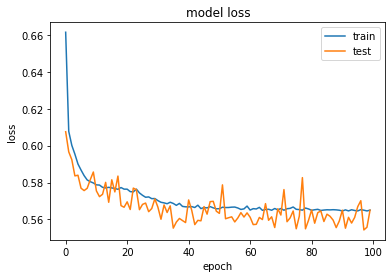

In [331]:

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

The test and train loss is decreasing in similar manner, which means we managed to avoid overfitting

In [332]:
X_pred=model.predict(X_test_scaled)

In [333]:
mse=np.mean(np.power(X_test_scaled - X_pred, 2), axis=1)

In [334]:
mse.shape

(56962,)

In [335]:
threshold=np.quantile(mse, 0.98)
threshold

3.0226066125296454

In [336]:
y_pred=np.where(mse>=threshold,1,0)

In [337]:
recall_score(y_test, y_pred)
precision_score(y_test, y_pred)

0.7551020408163265

0.06491228070175438

In [338]:
def precision_recall_curve(X,y,model):
    X_pred=model.predict(X)
    mse=np.mean(np.power(X - X_pred, 2), axis=1)
    recall=[]
    precision=[]
    threshold_percentile=[]
    for i in range(1,1000,1):
        percentile=1-i/20000
        threshold_percentile.append(percentile)
        threshold=np.quantile(mse, percentile)
        y_pred=np.where(mse>=threshold,1,0)
        score_rec=recall_score(y, y_pred)
        score_prec=precision_score(y,y_pred)
                                    
        recall.append(score_rec)
        precision.append(score_prec)
    
    precision=np.asarray(precision)
    recall=np.asarray(recall)
    threshold_percentile=np.asarray(threshold_percentile)
    
    df=pd.DataFrame(threshold_percentile, columns={"percentile"})
    df["recall"]= recall
    df["precision"]=precision
    return(df)

    

In [339]:
df_pr=precision_recall_curve(X_test_scaled,y_test,model)

In [340]:
df_pr.columns

Index(['percentile', 'recall', 'precision'], dtype='object')

In [360]:
trace1=go.Scatter(
        y=df_pr.recall,
        x=df_pr.percentile,
        mode='lines',
        marker=dict(
        color="red",
        size=5,
        opacity=0.5
        ),
        name="recall"
    )



trace2=go.Scatter(
        y=df_pr.precision,
        x=df_pr.percentile,
        mode='lines',
        marker=dict(
        color="green",
        size=5,
        opacity=0.5
        ),
        name="precission"
    )







data=[trace1, trace2]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Precision and recall for DNN Autocoder",
        yaxis=dict(title="Payment completeness"),
        xaxis=dict(title="Rank"),

    
    ))
iplot(figure)

DNN model managed to find over 85% of all frauds with precision around 3%, which is quite good for a class beeing represented by only 0,17% samples.

In [362]:
trace1=go.Scatter(
        y=df_pr.recall,
        x=df_pr.precision,
        mode='lines',
        marker=dict(
        color="red",
        size=5,
        opacity=0.5
        ),
        name="Autocoder"
    )

trace2=go.Scatter(
        y=np.asarray(IF_rec),
        x=np.asarray(IF_prec),
        mode='lines',
        marker=dict(
        color="blue",
        size=10,
        opacity=0.5
        ),
        name="Isolation Forest"
    )







    
data=[trace1,trace2]
figure=go.Figure(
    data=data,
    layout=go.Layout(
        title="Comparison od Recall vs Precision curves",
        yaxis=dict(title="Recall"),
        xaxis=dict(title="Precision")

    
    ))
iplot(figure)

### While Isolation Forest seems to higher recall for precisions above 20%, DNN is better at achieving very high Fraud detection rates, even if we risk more False Positives